# seaborn :regplot

In [6]:
import seaborn as sns

In [7]:
from matplotlib import pyplot as plt

In [8]:
diamonds=sns.load_dataset('diamonds')
diamonds.shape

(53940, 10)

diamonds=sns.load_dataset('diamonds')
diamonds.shape

In [4]:
FileNotFoundError                         Traceback (most recent call last)
Cell In[3], line 2
      1 # read dataset
----> 2 dataset=pd.read_csv('./Melbourne_housing_FULL.csv')
      3 dataset.head()

File ~\anaconda3\Lib\site-packages\pandas\io\parsers\readers.py:948, in read_csv(filepath_or_buffer, sep, delimiter, header, names, index_col, usecols, dtype, engine, converters, true_values, false_values, skipinitialspace, skiprows, skipfooter, nrows, na_values, keep_default_na, na_filter, verbose, skip_blank_lines, parse_dates, infer_datetime_format, keep_date_col, date_parser, date_format, dayfirst, cache_dates, iterator, chunksize, compression, thousands, decimal, lineterminator, quotechar, quoting, doublequote, escapechar, comment, encoding, encoding_errors, dialect, on_bad_lines, delim_whitespace, low_memory, memory_map, float_precision, storage_options, dtype_backend)
    935 kwds_defaults = _refine_defaults_read(
    936     dialect,
    937     delimiter,
   (...)
    944     dtype_backend=dtype_backend,
    945 )
    946 kwds.update(kwds_defaults)
--> 948 return _read(filepath_or_buffer, kwds)

File ~\anaconda3\Lib\site-packages\pandas\io\parsers\readers.py:611, in _read(filepath_or_buffer, kwds)
    608 _validate_names(kwds.get("names", None))
    610 # Create the parser.
--> 611 parser = TextFileReader(filepath_or_buffer, **kwds)
    613 if chunksize or iterator:
    614     return parser

File ~\anaconda3\Lib\site-packages\pandas\io\parsers\readers.py:1448, in TextFileReader.__init__(self, f, engine, **kwds)
   1445     self.options["has_index_names"] = kwds["has_index_names"]
   1447 self.handles: IOHandles | None = None
-> 1448 self._engine = self._make_engine(f, self.engine)

File ~\anaconda3\Lib\site-packages\pandas\io\parsers\readers.py:1705, in TextFileReader._make_engine(self, f, engine)
   1703     if "b" not in mode:
   1704         mode += "b"
-> 1705 self.handles = get_handle(
   1706     f,
   1707     mode,
   1708     encoding=self.options.get("encoding", None),
   1709     compression=self.options.get("compression", None),
   1710     memory_map=self.options.get("memory_map", False),
   1711     is_text=is_text,
   1712     errors=self.options.get("encoding_errors", "strict"),
   1713     storage_options=self.options.get("storage_options", None),
   1714 )
   1715 assert self.handles is not None
   1716 f = self.handles.handle

File ~\anaconda3\Lib\site-packages\pandas\io\common.py:863, in get_handle(path_or_buf, mode, encoding, compression, memory_map, is_text, errors, storage_options)
    858 elif isinstance(handle, str):
    859     # Check whether the filename is to be opened in binary mode.
    860     # Binary mode does not support 'encoding' and 'newline'.
    861     if ioargs.encoding and "b" not in ioargs.mode:
    862         # Encoding
--> 863         handle = open(
    864             handle,
    865             ioargs.mode,
    866             encoding=ioargs.encoding,
    867             errors=errors,
    868             newline="",
    869         )
    870     else:
    871         # Binary mode
    872         handle = open(handle, ioargs.mode)

FileNotFoundError: [Errno 2] No such file or directory: './Melbourne_housing_FULL.csv'

​

SyntaxError: invalid syntax (3274591294.py, line 1)

In [9]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
diamonds=diamonds.sample(n=200,random_state=44)
diamonds.shape

(200, 10)

## intro visuals

## basics

In [11]:
sns.set_style('dark')

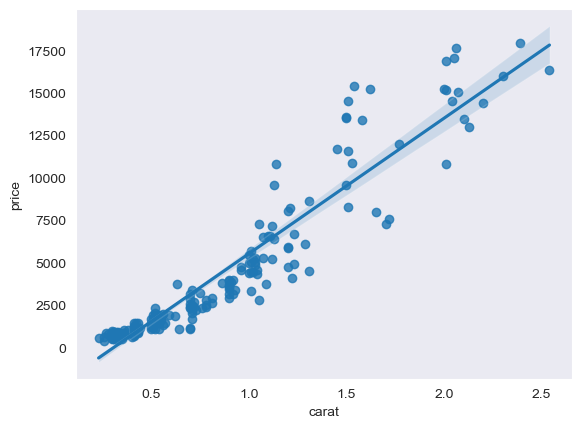

In [12]:
sns.regplot(x=diamonds.carat,y=diamonds.price);

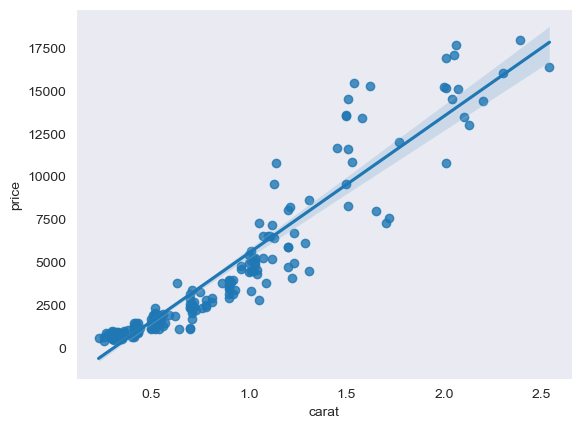

In [13]:
sns.regplot(x='carat',y='price',data=diamonds);

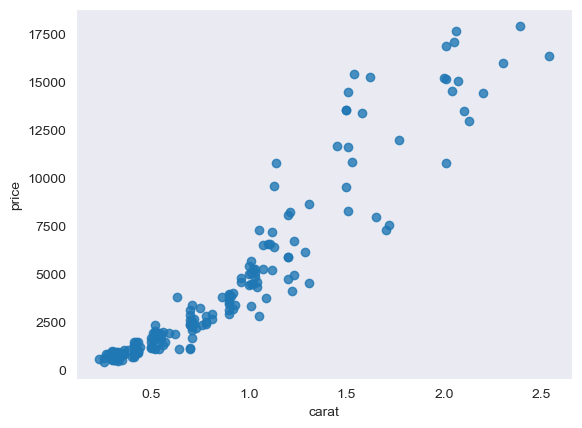

In [14]:
sns.regplot(x='carat',y='price',data=diamonds,fit_reg=False);

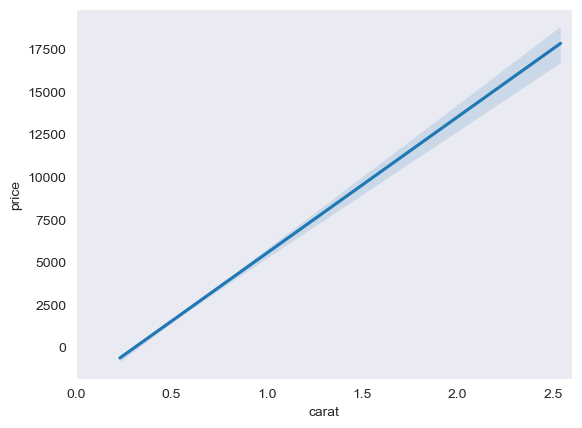

In [15]:
plt.gca().set(xlim=(0,2.6))
sns.regplot(x='carat',y='price',data=diamonds,scatter=False);

## regplot options

## confidence intervals

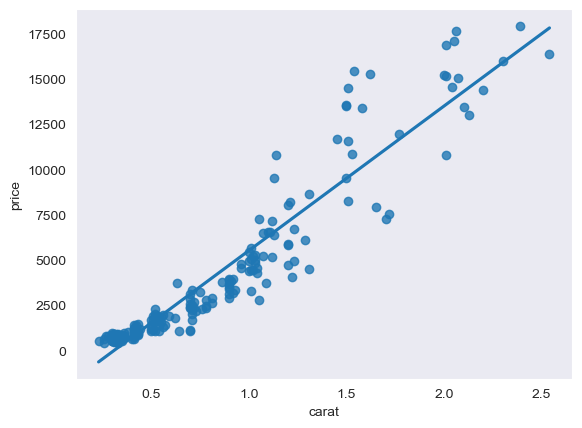

In [16]:
sns.regplot(x='carat',y='price',data=diamonds,ci=None);

##discrete variables 

In [17]:
cut_map={
    'Fair':1,
    'Good':2,
    'Very Good':3,
    'Premium':4,
    'Ideal':5
}
diamonds['cut_value']=diamonds.cut.map(cut_map)

In [18]:
diamonds.cut_value.value_counts()

cut_value
5    80
4    63
3    39
2    11
1     7
Name: count, dtype: int64

## jitter

In [20]:
sns.regplot(x='cut_value',y='price',data=diamonds,
           x_jitter=0.1
           );

TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


## estimate aggregrate

In [21]:
import numpy as np

In [24]:
sns.regplot(x='cut_value',y='price',data=diamonds,
            x_estimator=np.mean
           );

TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


## polynomial regression

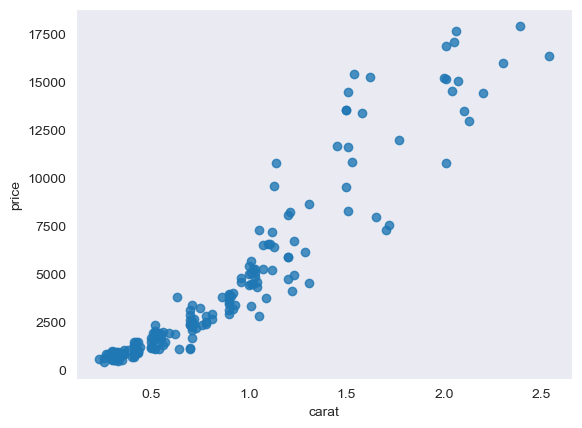

In [25]:
sns.regplot(x='carat',y='price',data=diamonds,
           fit_reg=False);

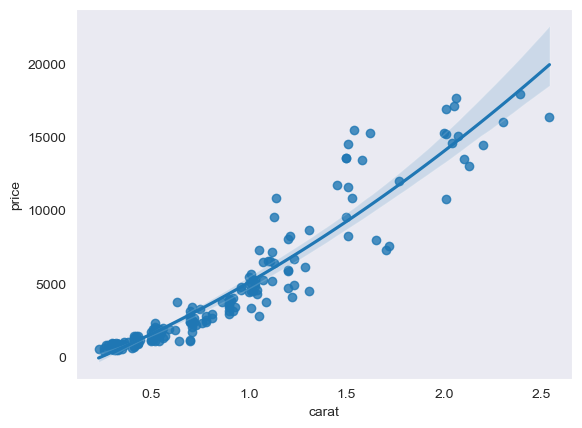

In [26]:
sns.regplot(x='carat',y='price',data=diamonds,order=2
           );

## regression robust

In [27]:
x_example=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
y_example=[0.1,0.8,2.2,2.7,3.8,4.5,6.2,6.8,7.9,9.4,30.4]

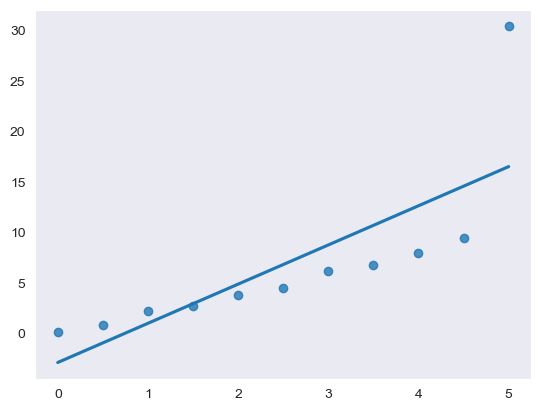

In [28]:
sns.regplot(x=x_example,
           y=y_example,
           ci=None);

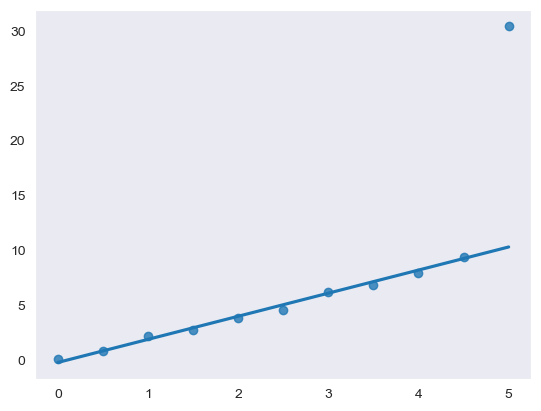

In [29]:
sns.regplot(x=x_example,
           y=y_example,
           ci=None,
           robust=True);

## styling

In [30]:
sns.set_style('white')

## marker

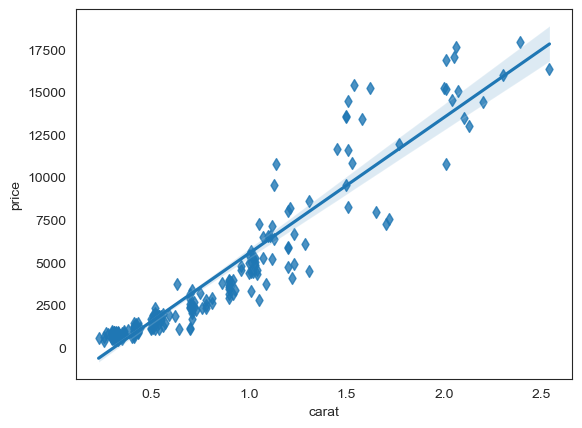

In [31]:
sns.regplot(x='carat',y='price',data=diamonds,marker='d'
           );

## scatter_kws

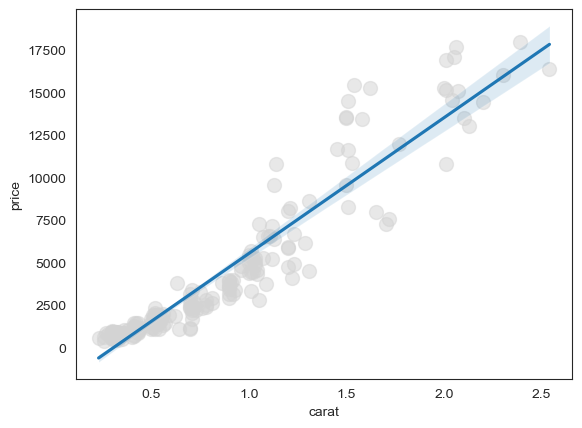

In [32]:
sns.regplot(x='carat',y='price',data=diamonds,
           scatter_kws={'s':100,'alpha':0.5,'color':'lightgray'});

## line_kws

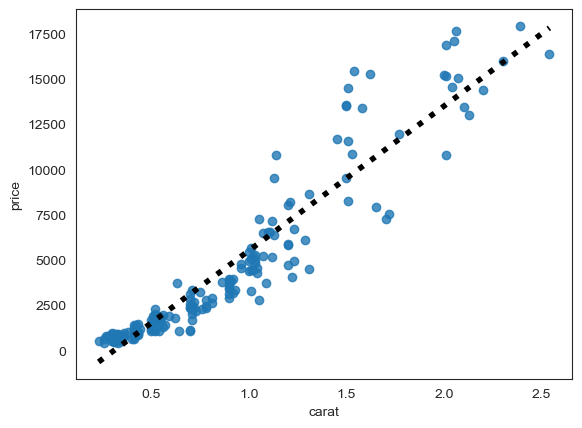

In [35]:
sns.regplot(x='carat',y='price',data=diamonds,
           ci=None,
           line_kws={'lw':4,'color':'black','linestyle':'dotted'});